The aim of this project is to predict the power consumption of a HVAC system for a standard commercial building located in Florida, USA. The input dataset contains the values of outside ambient temperature (OAT) in Fahrenheit and the correlated power consumption in kilowatts. The data are referred to year 2010, with time intervals of 15 minutes. The procedure will be done by the use of three different methods: linear regression split, cross validation and random forest regression

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Data extraction and dataframe creation and arrangement

In [8]:
DataFolderPath = "C:\Users\Giulia\Desktop\EETBS_Project_partB"
ConsumptionFileName = "US_CommercialBuilding_Temp_Consumption.csv"
ConsumptionFilePath = DataFolderPath+"/"+ConsumptionFileName  
DF_consumption = pd.read_csv(ConsumptionFilePath,sep = ",",index_col= 0)
previousIndex = DF_consumption.index 
ParsedIndex = pd.to_datetime(previousIndex)
DF_consumption.index = ParsedIndex
DF_consumption_cleaned=DF_consumption.dropna()

UPDATED DATAFRAME ONLY FOR SUMMER

In [9]:
DF_summer = DF_consumption_cleaned["21/6/2010 0:00":"21/9/2010 0:00"] 


Normalizing and plotting consumption values for one day time period, from 1st July to 2nd July.

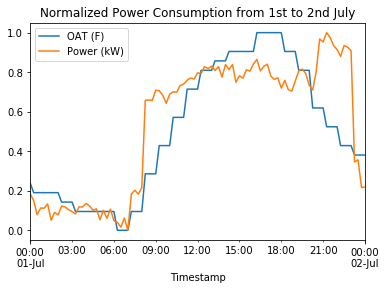

In [10]:
DF_myDates = DF_consumption_cleaned["7/1/2010 0:00":"7/2/2010 0:00"]
df_chosen_dates = DF_consumption["7/1/2010 0:00":"7/2/2010 0:00"]
df_chosen_dates_normalized = (df_chosen_dates- df_chosen_dates.min())/(df_chosen_dates.max()-df_chosen_dates.min())
df_chosen_dates_normalized.plot()
plt.title("Normalized Power Consumption from 1st to 2nd July")
plt.show()

Splitting the plots on two separated graphs

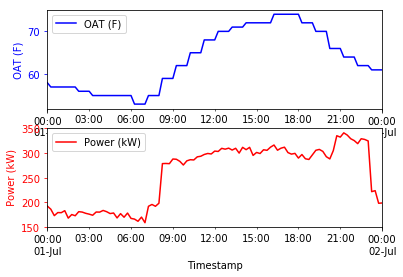

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
DF_myDates.iloc[:,0].plot(ax=ax1,legend=True,color="b")
DF_myDates.iloc[:,1].plot(ax=ax2,legend=True,color="r")
ax1.set_ylabel(" OAT (F) ", color="b")
ax2.set_ylabel(" Power (kW)", color="r")
ax1.tick_params(axis='y',colors='b')
ax2.tick_params(axis='y',colors='r')
plt.show()

Normalizing and plotting consumption values for one day time period, from 1st July to 4th July.

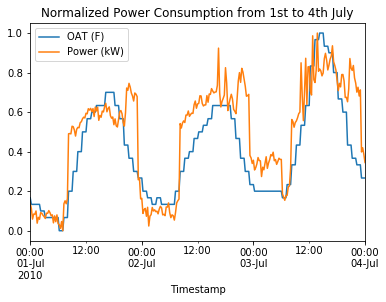

In [12]:
DF_myDates = DF_consumption_cleaned["7/1/2010 0:00":"7/4/2010 0:00"]
df_chosen_dates_normalized = (DF_myDates- DF_myDates.min())/(DF_myDates.max()-DF_myDates.min())
df_chosen_dates_normalized.plot()
plt.title("Normalized Power Consumption from 1st to 4th July")
plt.show()

Splitting the plots on two separated graphs

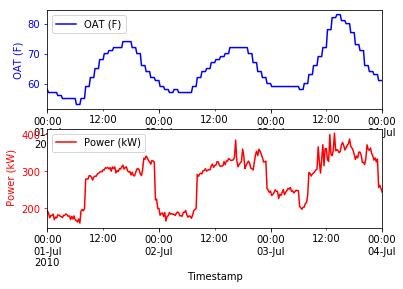

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
DF_myDates.iloc[:,0].plot(ax=ax1,legend=True,color="b")
DF_myDates.iloc[:,1].plot(ax=ax2,legend=True,color="r")
ax1.set_ylabel(" OAT (F) ", color="b")
ax2.set_ylabel(" Power (kW)", color="r")
ax1.tick_params(axis='y',colors='b')
ax2.tick_params(axis='y',colors='r')
plt.show()

Defining of lag_column function and using it to shift dataframe. This is done to increase the prediction's accurancy.

UPDATED SHIFTING VALUES

In [14]:
DF_FinalDataSet = DF_summer.copy()

def lag_column(df,column_name,lag_period=1):
    for i in range(4,lag_period+1,1):
        new_column_name = column_name+"-"+str(i)+"hr"
        df[new_column_name]=df[column_name].shift(i)
    return df

DF_FinalDataSet=lag_column(DF_FinalDataSet,"Power (kW)",96)
DF_FinalDataSet=lag_column(DF_FinalDataSet,"OAT (F)",24)
DF_FinalDataSet.dropna(inplace=True)

Starting with machine learning method

1) Linear Regression Method

Setting the target and splitting the data in test and train values with a 20:80 ratio

In [15]:
DF_target = DF_FinalDataSet["Power (kW)"] 
DF_features = DF_FinalDataSet.drop("Power (kW)",axis=1)  

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (DF_features, DF_target, test_size = 0.2, random_state=41234)

Importing linear regression and calculating the prediction for one day time period, from 1st July to 2nd July. 

In [16]:
from sklearn import linear_model
linear_reg=linear_model.LinearRegression()
linear_reg.fit(X_train,Y_train)
predict_linearReg_split=linear_reg.predict(X_test)
predict_DF_linearReg_split=pd.DataFrame(predict_linearReg_split,index =Y_test.index,columns =["Prediction_linearReg_split"])
predict_DF_linearReg_split=predict_DF_linearReg_split.join(Y_test)
predict_DF_linearReg_split_ChosenDAtes= predict_DF_linearReg_split["7/1/2010 0:00":"7/2/2010 0:00"]

Plotting the results

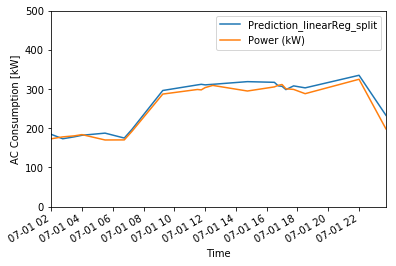

In [17]:
predict_DF_linearReg_split_ChosenDAtes.plot()
plt.xlabel("Time")
plt.ylabel("AC Consumption [kW]")
plt.ylim([0,500])
plt.show()

Calculating the prediction for three day time period, from 1st July to 4th July. 

In [18]:
predict_DF_linearReg_split=pd.DataFrame(predict_linearReg_split,index =Y_test.index,columns =["Prediction_linearReg_split"])
predict_DF_linearReg_split=predict_DF_linearReg_split.join(Y_test)
predict_DF_linearReg_split_ChosenDAtes= predict_DF_linearReg_split["7/1/2010 0:00":"7/4/2010 0:00"]

Plotting the results

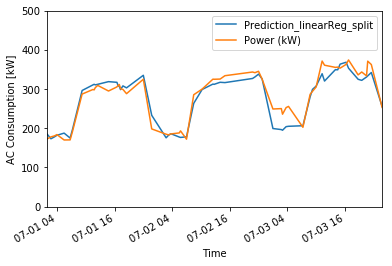

In [19]:
predict_DF_linearReg_split_ChosenDAtes.plot()
plt.xlabel("Time")
plt.ylabel("AC Consumption [kW]")
plt.ylim([0,500])
plt.show()

Calculating Mean Absolute Error (MAE), Mean Squared Error (MSE) and Coefficient of determination (R2) values in order to evaluate the goodness of the model.

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error_linearReg_split = mean_absolute_error(Y_test,predict_linearReg_split)
mean_squared_error_linearReg_split = mean_squared_error(Y_test,predict_linearReg_split)
R2_score_linearReg_split = r2_score(Y_test, predict_linearReg_split)

2) Cross Validation Method

Importing Cross Validation, calculating the prediction and plotting the results for one day time period, from 1st July to 2nd July. 

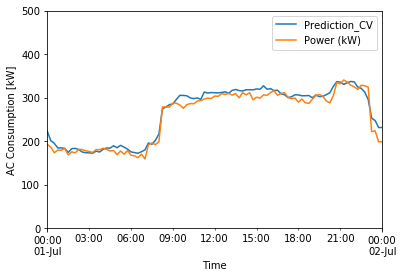

In [21]:
from sklearn.model_selection import cross_val_predict

predict_linearReg_CV=cross_val_predict(linear_reg,DF_features,DF_target,cv =20) #cv=10 we choose to perform the cross validation by dividing the data set into 10 parts

predict_DF_linearReg_CV=pd.DataFrame(predict_linearReg_CV,index =DF_target.index,columns =["Prediction_CV"])
predict_DF_linearReg_CV=predict_DF_linearReg_CV.join(DF_target)

predict_DF_linearReg_CV_ChosenDAtes= predict_DF_linearReg_CV["7/1/2010 0:00":"7/2/2010 0:00"]
predict_DF_linearReg_CV_ChosenDAtes.plot()
plt.xlabel("Time")
plt.ylabel("AC Consumption [kW]")
plt.ylim([0,500])
plt.show()

Calculating the prediction and plotting for three day time period, from 1st July to 4th July. 

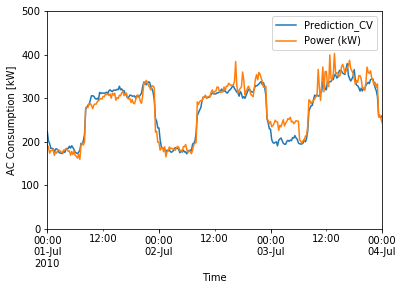

In [22]:
predict_DF_linearReg_CV_longerPeriod= predict_DF_linearReg_CV["7/1/2010 0:00":"7/4/2010 0:00"]
predict_DF_linearReg_CV_longerPeriod.plot()
plt.xlabel("Time")
plt.ylabel("AC Consumption [kW]")
plt.ylim([0,500])
plt.show()

Calculating Mean Absolute Error (MAE), Mean Squared Error (MSE) and Coefficient of determination (R2) values in order to evaluate the goodness of the model.

In [23]:
mean_absolute_error_CV=mean_absolute_error(DF_target,predict_linearReg_CV)
mean_squared_error_CV=mean_squared_error(DF_target,predict_linearReg_CV)
R2_score_CV= r2_score(DF_target,predict_linearReg_CV)

3) Random Forest Method

Importing Random Forest, calculating the prediction and plotting for one day time period, from 1st July to 2nd July.

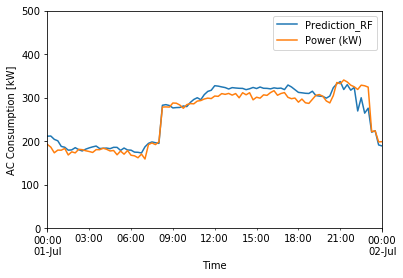

In [25]:
from sklearn.ensemble import RandomForestRegressor
reg_RF=RandomForestRegressor()

predict_RF_CV=cross_val_predict(reg_RF,DF_features,DF_target,cv =10)

predict_DF_RF_CV=pd.DataFrame(predict_RF_CV,index =DF_target.index,columns =["Prediction_RF"])
predict_DF_RF_CV=predict_DF_RF_CV.join(DF_target)
predict_DF_RF_CV_ChosenDAtes= predict_DF_RF_CV["7/1/2010 0:00":"7/2/2010 0:00"]
predict_DF_RF_CV_ChosenDAtes.plot()
plt.xlabel("Time")
plt.ylabel("AC Consumption [kW]")
plt.ylim([0,500])
plt.show()

Calculating the prediction and plotting for three day time period, from 1st July to 4th July. 

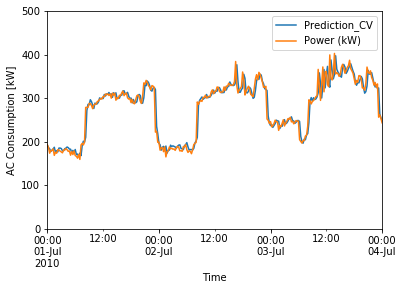

In [18]:
predict_DF_linearReg_CV_longerPeriod= predict_DF_linearReg_CV["7/1/2010 0:00":"7/4/2010 0:00"]
predict_DF_linearReg_CV_longerPeriod.plot()
plt.xlabel("Time")
plt.ylabel("AC Consumption [kW]")
plt.ylim([0,500])
plt.show()

Calculating Mean Absolute Error (MAE), Mean Squared Error (MSE) and Coefficient of determination (R2) values in order to evaluate the goodness of the model.

In [21]:
mean_absolute_error_linearREG_split=mean_absolute_error(DF_target,predict_RF_CV)
mean_squared_error_RF_split=mean_squared_error(DF_target,predict_RF_CV)
R2_score_linearReg_split= r2_score(DF_target,predict_RF_CV)

From graphs and error values is possible to notice the increasing accurancy of the predictions with increasing complexity of chosen model. The best prediction is made by Random Forest Method whereas the worst one is obtained by Linear regression method, which still has a high level of approximation.

Linear regression -> MAE: 14.5398799941 MSE: 398.702113588 R2: 0.906620770291

Cross Validation -> MAE: 14.9040572608 MSE: 420.326045285 R2: 0.901692151483

RandomForest -> MAE: 10.1385478424 MSE: 283.883833095 R2: 0.934158932074